# VIsualizations

In this notebook we will store the code that was used to produce our visualizations.

### Visualizations of monthly occuring terms
First we find the words that we want to look at over the course of a few years.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
word = pd.read_csv('Data/wordCountYear_Clean_v3.csv',index_col=0)
word.head()

,Unnamed: 1,a,aar,aarau,aax,aay,abandonné,abattu,abb,abbaye,...,évéque,évêque,êles,êlre,êtr,îes,île,œil,œuvre,œx
1798-02-01,0.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,73.0,0.0,0.0,0.0,0.0,0.0
1798-03-01,0.0,26.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,0.0,0.0
1798-04-01,0.0,19.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.0,...,0.0,0.0,0.0,0.0,126.0,0.0,0.0,0.0,0.0,0.0
1798-05-01,0.0,40.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,180.0,0.0,0.0,0.0,0.0,0.0
1798-06-01,0.0,21.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,156.0,0.0,0.0,0.0,0.0,0.0


In [60]:
word.index = pd.to_datetime(word.index)
yearIndex = word.index
#normalization
wordNorm = word.divide(word.sum(axis=1).values,axis=0)

Now let's search for Words that are interesting to look at. We want to look at the appearance of the word over the course of a few years to take a good look at the monthly periodicity.

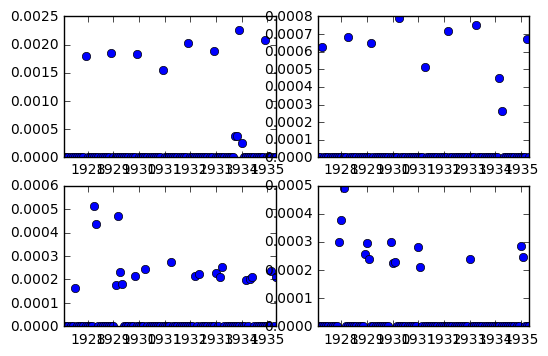

In [76]:
plt.subplot(2,2,1)
plt.plot_date(yearIndex[1500:1600],wordNorm['noël'].values[1500:1600])
plt.subplot(2,2,2)
plt.plot_date(yearIndex[1500:1600],wordNorm['pâques'].values[1500:1600])
plt.subplot(2,2,3)
plt.plot_date(yearIndex[1500:1600],wordNorm['printemps'].values[1500:1600])
plt.subplot(2,2,4)
plt.plot_date(yearIndex[1500:1600],wordNorm['hiver'].values[1500:1600])

Initializing Plotly

In [77]:
import plotly 
plotly.tools.set_credentials_file(username='Project_ADA', api_key='LpR6Vg0wCSbJcSvQEnF3')

Plotting the monthly periodic words.

In [82]:
import plotly.plotly as py
from plotly.graph_objs import *

xValues = yearIndex[1500:1600]
christmas = wordNorm['noël'].values[1500:1600]
easter = wordNorm['pâques'].values[1500:1600]
spring = wordNorm['printemps'].values[1500:1600]
winter = wordNorm['hiver'].values[1500:1600]

trace1 = Scatter(
    x=xValues, y=christmas,
    line=Line(
        color='#FFD700',
        width=3
    ),
    name='Noël'
)

trace2 = Scatter(
    x=xValues, y=easter,
    line=Line(
        color='#C0C0C0',
        width=3
    ),
    name='Pâques'
)

trace3 = Scatter(
    x=xValues, y=spring,
    line=Line(
        color='#BA8651',
        width=3
    ),
    name='Printemps'
)

trace4 = Scatter(
    x=xValues, y=winter,
    line=Line(
        color='#000000',
        width=4
    ),
    name='Hiver'
)

data = Data([trace1, trace2, trace3, trace4])
layout = Layout(
    title='Word Frequency of words that have a monthly periodicity',
    updatemenus=list([
        dict(
            x=-0.05,
            y=1,
            yanchor='top',
            buttons=list([
                dict(
                    args=['visible', [True, True, True, True]],
                    label='All',
                    method='restyle'
                ),
                dict(
                    args=['visible', [True, False, False, False]],
                    label='Noël',
                    method='restyle'
                ),
                dict(
                    args=['visible', [False, True, False, False]],
                    label='Pâques',
                    method='restyle'
                ),
                dict(
                    args=['visible', [False, False, True, False]],
                    label='Printemps',
                    method='restyle'
                ),
                dict(
                    args=['visible', [False, False, False, True]],
                    label='Hiver',
                    method='restyle'
                )
            ]),
        )
    ]),
)
fig = Figure(data=data, layout=layout)
py.iplot(fig,filename = 'MonthlyWordFreq')

## Distribution of the word Frequency

(0, 3000)

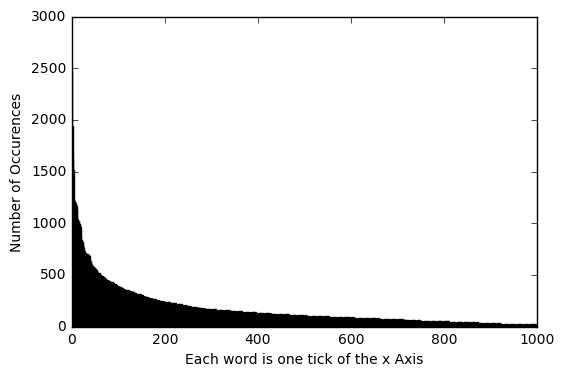

In [83]:
width = 0.7
totWords = 1000
numWords =len(word.loc[yearIndex[1000]].sort_values(ascending=False).index[0:totWords])
plt.bar(np.arange(numWords),
        word.loc[yearIndex[1000]].sort_values(ascending=False).values[0:totWords],width)
plt.ylabel('Number of Occurences')
plt.xlabel('Each word is one tick of the x Axis')
plt.ylim([0,3000])

In [112]:
import plotly.plotly as py
import plotly.graph_objs as go

data = [go.Bar(
            x=word.loc[yearIndex[1000]].sort_values(ascending=False).index[0:totWords],
            y=word.loc[yearIndex[1000]].sort_values(ascending=False).values[0:totWords]
    )]

layoutwordfreq = Layout(
    title='Distribution of word count')
fig = Figure(data=data, layout=layoutwordfreq)
py.iplot(fig, filename='wordDistribution',show_link=False)

## Word Clouds
We propose to implement a wordcloud video, where we compute one word cloud per time point, and then we create a video from all the different word clouds, that will illustrate the evolution of the word set over time.

In [149]:
words = word.columns.astype(str)
numWords = word.loc[word.index[2000]].values
numWords2 = word.loc[word.index[2001]].values

In [150]:
listWords = []
listWords2 = []
for counter,i in enumerate(words):
    listWords.append(str(str(i)+' ')*numWords[counter])
    listWords2.append(str(str(i)+' ')*numWords2[counter])

/Users/thomas/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:4: VisibleDeprecationWarning:

using a non-integer number instead of an integer will result in an error in the future

/Users/thomas/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:5: VisibleDeprecationWarning:

using a non-integer number instead of an integer will result in an error in the future



In [151]:
test = ' '.join(listWords)
test2 = ' '.join(listWords2)

In [143]:
from wordcloud import WordCloud

In [251]:
wordcloud = WordCloud().generate(test)
wordcloud2 = WordCloud().generate(test2)

We first show the two word clouds that were computed separately.

(-0.5, 399.5, 199.5, -0.5)

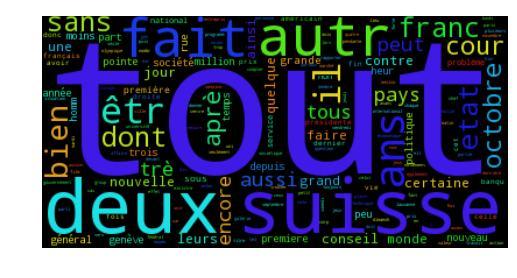

In [252]:
plt.imshow(wordcloud)
plt.axis("off")

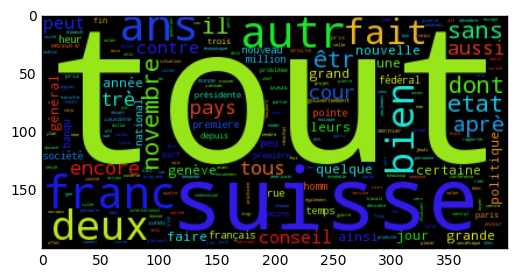

In [253]:
plt.imshow(wordcloud2)

What can be seen here is that the same word does not have the same color, and the same words appear at different places on the word cloud. Therefore we have to keep the position of the words in the first word cloud and add them to the other word cloud.

In [254]:
for i in range(len(wordcloud2.layout_)):
    word = wordcloud2.layout_[i][0][0]
    for j in range(len(wordcloud.layout_)):
        otherWord = wordcloud.layout_[j][0][0]
        if otherWord == word:
            wordcloud2.layout_[i] = list(wordcloud2.layout_[i])
            wordcloud2.layout_[i][2:] = list(wordcloud.layout_[j][2:])
            wordcloud2.layout_[i] = tuple(wordcloud2.layout_[i])
            break

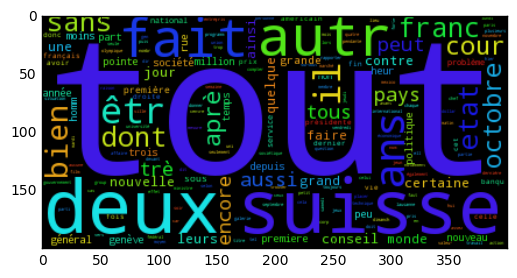

In [259]:
plt.imshow(wordcloud)

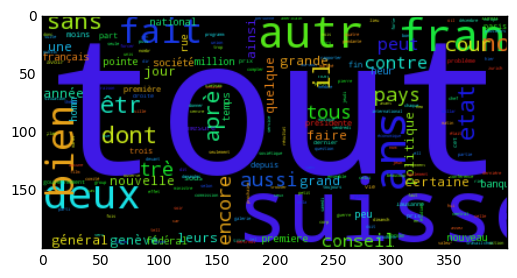

In [260]:
plt.imshow(wordcloud2)

We can see that the words have the same color and same position, but the overlap. We also see that there are a lot of empty spaces. This is due to the fact that the time series of a word is extremely noisy and therefore there is no smooth transition between two consecutive timepoints. To be able to generate a nice video that makes sense we will have to smooth out the data, and maybe have a resolution at the year level and not the month level.